In [4]:
import cv2
from skimage.filters import median
img_gaussian=cv2.imread('img.jpg',0)
img_salt_pepper=cv2.imread('img2.jpg',0)
img=img_salt_pepper
medium_using_cv2=cv2.medianBlur(img,3)
from skimage.morphology import disk
median_using_skimage=median(img,disk(3),mode='constant',cval=0.0)
cv2.imshow("Orginal",img)
cv2.imshow("median_using_skimage",median_using_skimage)
cv2.imshow("medium_using_cv2",medium_using_cv2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Introduction to Bilateral Filtering

In [1]:
import cv2
from skimage.filters import median
img_gaussian=cv2.imread('img.jpg',0)
img_salt_pepper=cv2.imread('img2.jpg',0)
img=img_salt_pepper
bilateral_using_cv2 = cv2.bilateralFilter(img, 5, 20, 100, 
borderType=cv2.BORDER_CONSTANT)
from skimage.restoration import denoise_bilateral
bilateral_using_skimage=denoise_bilateral(img,sigma_color=0.005,sigma_spatial=15,channel_axis=None)
cv2.imshow("orginal",img)
cv2.imshow("Bilateral",bilateral_using_cv2)
cv2.imshow("bilateral skimage",bilateral_using_skimage)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\shaki\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Introduction to NLM Filtering:

In [6]:
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
img_gaussian_noise = img_as_float(io.imread('img1.jpg', as_gray=True))
img_salt_pepper_noise = img_as_float(io.imread('img2.jpg', as_gray=True))
img = img_gaussian_noise
sigma_est = np.mean(estimate_sigma(img, channel_axis=True))
#sigma_est = 0.1
denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True,
patch_size=5, patch_distance=3, channel_axis=None)

cv2.imshow("Original", img)
cv2.imshow("NLM Filtered", denoise_img)
cv2.waitKey(0) 
cv2.destroyAllWindows()


# Denoising Works using Total Variance filtering

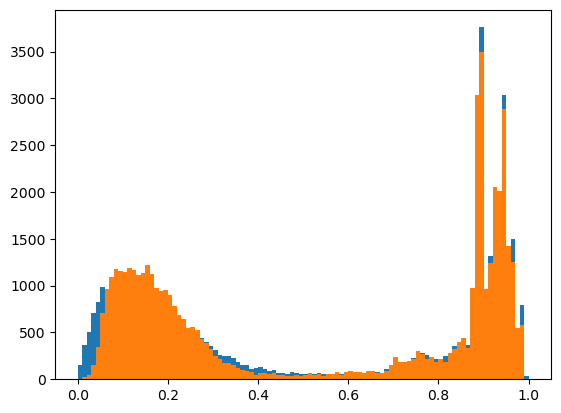

In [9]:
import cv2
from skimage import io,img_as_float
from skimage.restoration import denoise_tv_chambolle
from matplotlib import pyplot as plt
img=img_as_float(io.imread('img1.jpg',as_gray=True))
plt.hist(img.flat, bins=100, range=(0,1)) 
denoise_img = denoise_tv_chambolle(img, weight=0.1, eps=0.0002, channel_axis=False)
plt.hist(denoise_img.flat, bins=100, range=(0,1)) 
cv2.imshow("Original", img)
cv2.imshow("TV Filtered", denoise_img)
cv2.waitKey(0) 
cv2.destroyAllWindows()

# Denoising using Block matching and 3D filtering (BM3D)

In [10]:
pip install bm3d

Note: you may need to restart the kernel to use updated packages.


In [12]:
from skimage import io,img_as_float
import bm3d
import cv2
noisy_img = img_as_float(io.imread("img1.jpg",  as_gray=True))
BM3D_denoised_image = bm3d.bm3d(noisy_img, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)
cv2.imshow("Original", noisy_img)
cv2.imshow("Denoised", BM3D_denoised_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
